In [1]:
#pip install jitcsde

In [2]:
#pip install jitcode

In [3]:
from jitcode import jitcode_lyap, y
from scipy.stats import sem
import numpy as np
import random
import matplotlib.pyplot as plt
from jitcode import jitcode, y
from jitcsde import jitcsde, y, t
from sympy import symbols
import scipy

In [ ]:
def plot_trajectory(f, y0, t_span, dt):
    # Initialize the JIT-compiled ODE system
    ode = jitcode(f)
    ode.set_integrator("dopri5")
    ode.set_initial_value(y0, t_span[0])

    # Create time evaluation points
    t_eval = np.arange(t_span[0], t_span[1], dt)
    y_result = np.empty((len(t_eval), len(y0)))

    # Integrate the system
    for i, t in enumerate(t_eval):
      y_result[i] = ode.integrate(t)

    # Plot the trajectory
    if len(y0) == 2:
        plt.plot(y_result[:, 0], y_result[:, 1], lw=0.5)
        plt.xlabel('y0')
        plt.ylabel('y1')
        plt.title('Phase Space Trajectory')
        plt.figure(figsize=(15,5))
        plt.plot(t_eval, y_result[:, 0], label='y0')
        plt.plot(t_eval, y_result[:, 1], label='y1')
    elif len(y0) == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(y_result[:, 0], y_result[:, 1], y_result[:, 2], lw=0.5)
        ax.set_xlabel('y0')
        ax.set_ylabel('y1')
        ax.set_zlabel('y2')
        ax.set_title('3D Phase Space Trajectory')
        plt.figure(figsize=(15, 5))
        plt.plot(t_eval, y_result[:, 0], label='y0')
        plt.plot(t_eval, y_result[:, 1], label='y1')
        plt.plot(t_eval, y_result[:, 2], label='y2')
    elif len(y0) > 3:
        for i in range(len(y0)):
            plt.figure(figsize=(10, 3))
            plt.plot(t_eval, y_result[:, i], label=f'y{i}')
    return y_result

def LE(f,initial_state,tspan): 
  n = len(f)
  ODE = jitcode_lyap(f, n_lyap=n)
  ODE.set_integrator("dopri5")
  ODE.set_initial_value(initial_state,0.0)

  lyaps = []
  for time in tspan:
    lyaps.append(ODE.integrate(time)[1])

  lyaps = np.vstack(lyaps)

  for i in range(n):
    lyap = np.average(lyaps[1000:,i])
    stderr = sem(lyaps[1000:,i])
    print("%i. Lyapunov exponent: % .4f ± %.4f" % (i+1,lyap,stderr))
  return lyaps
def KD(lyaps):
  lyaps=np.round(lyaps,2)
  s = 0
  j=0
  sorted_lyaps = np.sort(lyaps)[::-1]
  if np.all(sorted_lyaps > 0):
    print('repelling(diverging in all directions)')
    return
  elif np.all(sorted_lyaps < 0):
    print('attractor')
    return print('D=',0)
  else:
    for i in range(len(sorted_lyaps)):
      s_old = np.copy(s)
      s += sorted_lyaps[i]
      if s>=0:j+=1
      else:break
    D = j + np.sum(sorted_lyaps[:j])/np.abs(sorted_lyaps[j])
    return D.tolist()

**Van Der Pol Limit Cycle**

**- Original System**

+ lyapunov exponents

In [6]:
alpha, beta, mu = 0.1, 0.5, 1
f=[y(1),
   mu*(1-y(0)**2)*y(1) -y(0) +y(2),
  -alpha*y(2)-beta*y(0)
]
i_s=np.array([0.1,0.1,0.1])
tspan = np.arange(0.000001,50000,0.1)
lyaps_van_th=LE(f,initial_state=i_s, tspan=tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent:  0.0000 ± 0.0026
2. Lyapunov exponent: -0.9022 ± 0.0022
3. Lyapunov exponent: -1.6119 ± 0.0020


+ Kaplan-Yorke dimention

In [7]:
KD(np.mean(lyaps_van_th[1000:,:],axis=0))

1.0

+ Trajectory and time series

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


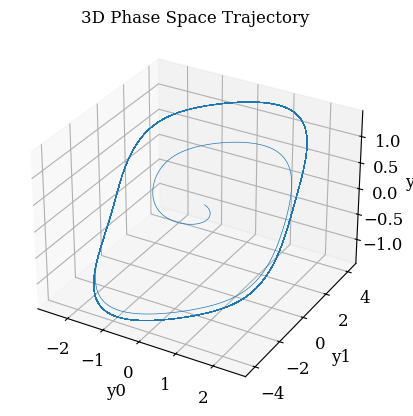

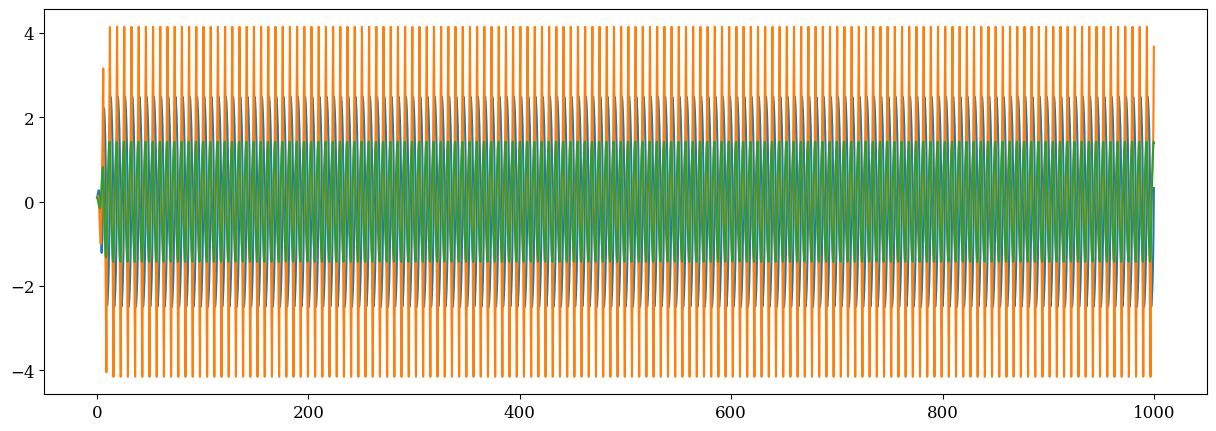

In [8]:
ts_van_th=plot_trajectory(f, y0=i_s, t_span=(0,1000), dt=0.01)

**- Reconstructed System**

+ lyapunov exponents

In [9]:
f=[-0.00319190381187527*y(0)**2*y(2) + 0.00923229048701736*y(0) + 0.992553776158531*y(1) + 0.0296052977837912*y(2),
 -0.00495228795753415 - 0.0011487624483629*y(0)*y(1) - 0.998839498895175*y(0)**2*y(1) + 0.0104999748812881*y(0)**2*y(2) + 0.000878736597937811*y(0)**2 - 0.991326488254312*y(0) + 1.03188412711359*y(1) + 0.939161929625077*y(2),
 0.00543115755012909 - 0.000917400599954498*y(0)*y(1) + 0.00246155446189248*y(0)*y(2) - 0.50328932147701*y(0) - 0.107205835491253*y(2)]
i_s=np.array([0.1,0.1,0.1])
time_step=0.005
tspan = np.arange(0.000001,50000,0.1)
lyaps_van_rec=LE(f,initial_state=i_s, tspan=tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent: -0.0000 ± 0.0026
2. Lyapunov exponent: -0.7167 ± 0.0021
3. Lyapunov exponent: -1.8978 ± 0.0022


- Kaplan-Yorke Dimention

In [10]:
KD(np.mean(lyaps_van_rec[1000:,:],axis=0))

1.0

- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


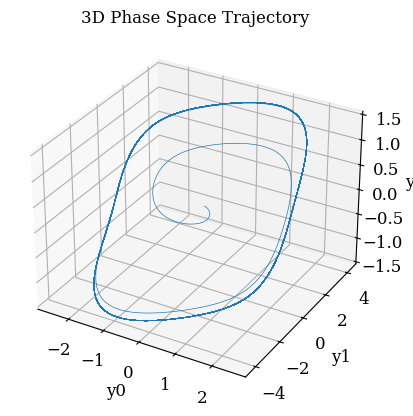

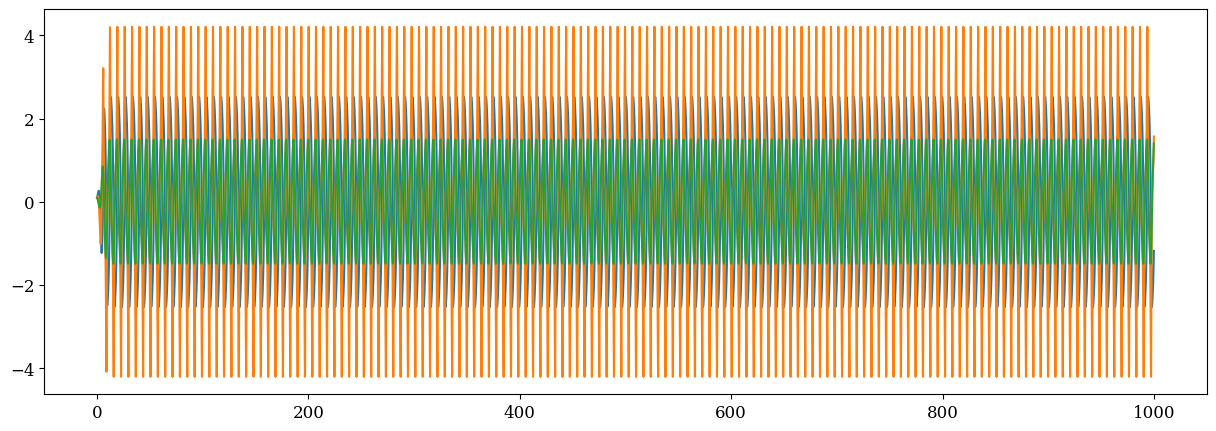

In [11]:
ts_van_rec=plot_trajectory(f, y0=i_s, t_span=(0,1000), dt=0.01)

- comparison reconstructed and theory

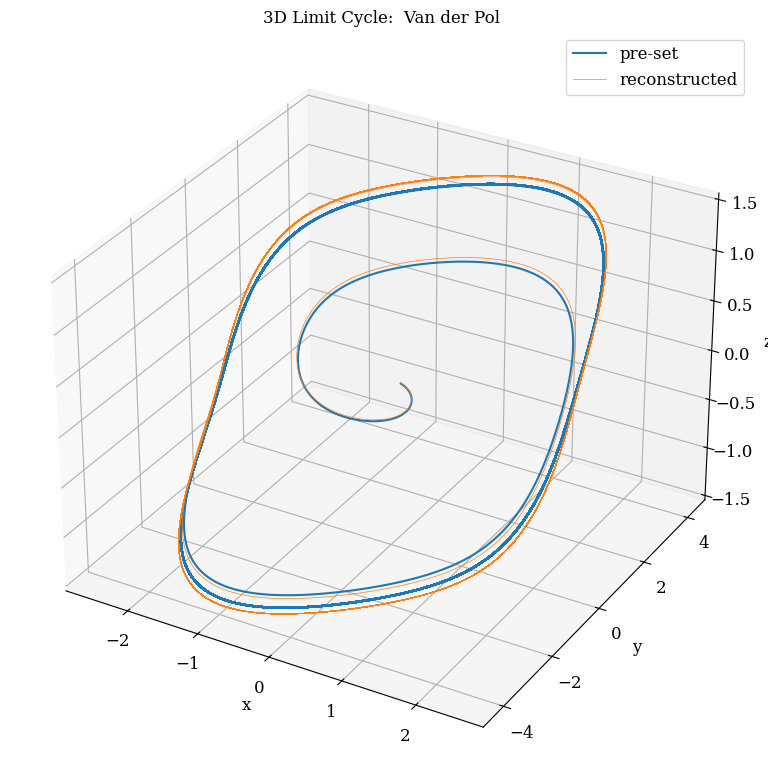

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(ts_van_th[:,0], ts_van_th[:,1], ts_van_th[:,2],label='pre-set')
ax.plot(ts_van_rec[:,0], ts_van_rec[:,1], ts_van_rec[:,2], lw=0.5,label='reconstructed')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Limit Cycle:  Van der Pol')
plt.legend()
plt.tight_layout()

# **B: Reconstruction of Dynamical Systems With Non-polynomial Drift functions**

## Pre-set system

- lyapunov exponents

In [13]:
from sympy import sinh
# Constants
R1 = 1.2
R2 = 3.44
R4 = 0.193
beta = 11.6
Ir = 2.25e-5

f = [
    (y(0)/R1) - ((y(0) - y(1))/R2) - 2 * Ir * sinh(beta * (y(0) - y(1))),
    ((y(0) - y(1))/R2) + 2 * Ir * sinh(beta * (y(0) - y(1))) - y(2),
    y(1) - R4 * y(2)
]

initial_conditions = [0.5, 0.5, 0.5]
dt = 0.01
tspan = np.arange(0.00001, 10000.0,dt)
lyaps_np_th=LE(f,initial_conditions,tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent:  0.0896 ± 0.0003
2. Lyapunov exponent:  0.0000 ± 0.0007
3. Lyapunov exponent: -13.6924 ± 0.0104


- KD dimentions

In [14]:
KD(np.mean(lyaps_np_th[1000:,:],axis=0))

2.006574141709277

- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


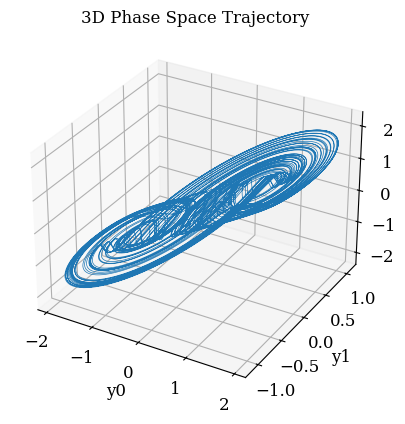

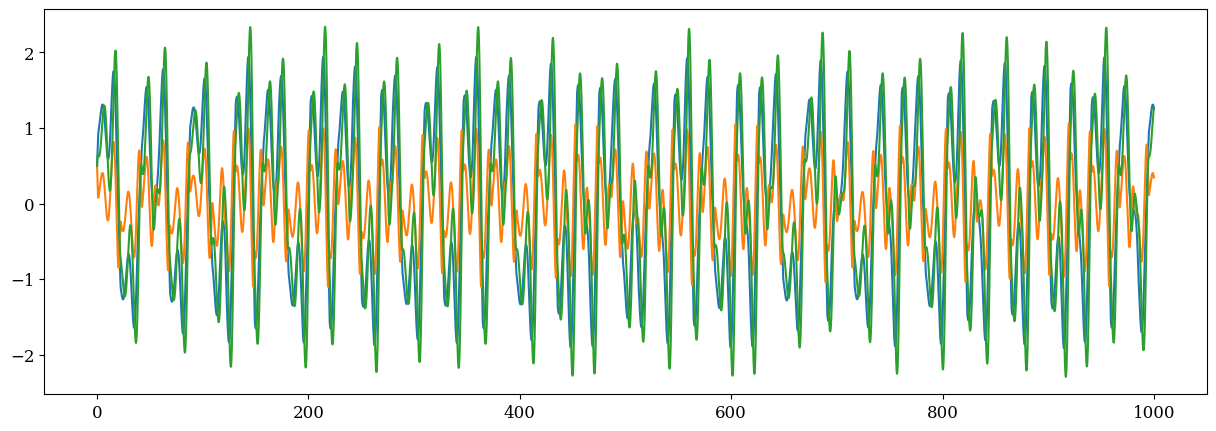

In [15]:
ts_np_th = plot_trajectory(f, y0=initial_conditions, t_span=(0,1000), dt=0.01)

## 3rd order taylor expansion

- lyapunov exponents

In [16]:
# Constants
R1 = 1.2
R2 = 3.44
R4 = 0.193
beta = 11.6
Ir = 2.25e-5


taylor3 = y(0)**3 - 3*y(0)**2*y(1) + 3*y(0)*y(1)**2 - y(1)**3
deltaV = y(0) - y(1)

f = [
    (y(0) / R1) - (deltaV / R2) - 2 * Ir * beta * deltaV - (2 * Ir * beta**3 / 6) * taylor3,
    (deltaV / R2) + 2 * Ir * beta * deltaV + (2 * Ir * beta**3 / 6) * taylor3 - y(2),
    y(1) - R4 * y(2)]


initial_conditions = [0.5, 0.5, 0.5]
dt = 0.01
tspan = np.arange(0.00001, 10000, dt)
lyaps_np_exp=LE(f,initial_conditions,tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent:  0.0009 ± 0.0003
2. Lyapunov exponent: -0.0073 ± 0.0004
3. Lyapunov exponent: -3.6716 ± 0.0021


- KD dimentions

In [17]:
KD(np.mean(lyaps_np_exp[1000:,:],axis=0))

1.0

- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


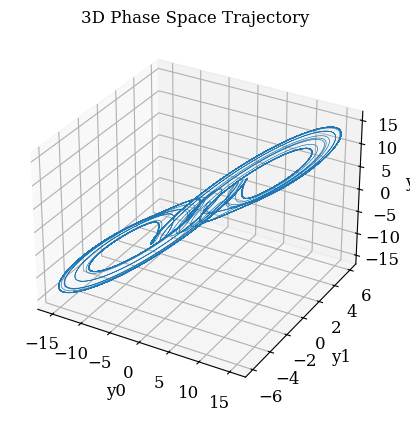

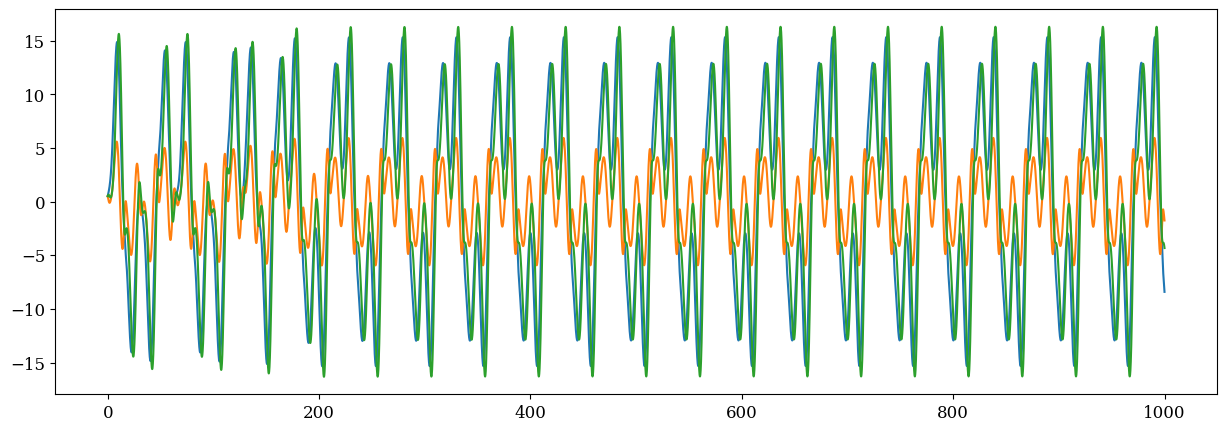

In [18]:
ts_np_exp = plot_trajectory(f, y0=initial_conditions, t_span=(0,1000), dt=0.01)

## Reconstructed System

- lyapunov exponents

In [19]:
f= [0.000794572740669083 + 0.00390141476716636*y(0)*y(1) - 2.02150232765612*y(0)*y(1)**2 + 0.00094990664938053*y(0)*y(2) - 0.107061696071932*y(0)*y(2)**2 + 2.01017570705183*y(0)**2*y(1) - 0.438539006175394*y(0)**2*y(2) - 0.00156268986264657*y(2)*y(1) - 0.16003573674056*y(2)*y(1)**2 + 0.153882297713722*y(2)**2*y(1) + 0.686127541121648*y(0)*y(2)*y(1) - 0.00145429034621339*y(0)**2 - 0.713571859346867*y(0)**3 - 0.00258079410848418*y(1)**2 + 0.714338588153709*y(1)**3 - 0.000324809303980395*y(2)**2 + 0.0287242097080755*y(2)**3 + 0.774594228655458*y(0) + 0.0486715459876661*y(1) + 0.0786870494318639*y(2),
 -0.000502076586017243 - 0.0022458001793401*y(0)*y(1) + 2.03129031853209*y(0)*y(1)**2 - 0.000530221747844259*y(0)*y(2) + 0.10844948648732*y(0)*y(2)**2 - 2.01547001071494*y(0)**2*y(1) + 0.436651747576932*y(0)**2*y(2) + 0.000484788651199336*y(2)*y(1) + 0.155772953050783*y(2)*y(1)**2 - 0.155038850811359*y(2)**2*y(1) - 0.681968463341942*y(0)*y(2)*y(1) + 0.00109723100254592*y(0)**2 + 0.714813474025419*y(0)**3 + 0.00150531757850251*y(1)**2 - 0.718605087519635*y(1)**3 + 0.000103136215524066*y(2)**2 - 0.0290800316946724*y(2)**3 + 0.0578039639886836*y(0) - 0.0479657763751582*y(1) - 1.07824190925153*y(2),
 -7.19573560818556e-06 - 0.000184019242076232*y(0)*y(1) + 0.00357506887393518*y(0)*y(1)**2 - 0.000147936531817125*y(0)*y(2) + 0.00241929871338269*y(0)*y(2)**2 - 0.00454073663350786*y(0)**2*y(1) - 0.0041735850365328*y(0)**2*y(2) + 0.000327651047968669*y(2)*y(1) - 0.0035419738518032*y(2)*y(1)**2 - 0.00219810650147096*y(2)**2*y(1) + 0.0075894784826744*y(0)*y(2)*y(1) + 5.82252501578122e-05*y(0)**2 + 0.00184952322779088*y(0)**3 + 0.000169102873149699*y(1)**2 - 0.00108915723811964*y(1)**3 + 5.65745515861854e-05*y(2)**2 - 0.000642749501011325*y(2)**3 - 0.000934798939379453*y(0) + 1.00074597481045*y(1) - 0.191692933064259*y(2)]


initial_conditions = [0.5, 0.5, 0.5]
dt = 0.01
tspan = np.arange(0.00001, 10000, dt)
lyaps_np_rec=LE(f,initial_conditions,tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent:  0.0906 ± 0.0003
2. Lyapunov exponent: -0.0000 ± 0.0005
3. Lyapunov exponent: -4.1592 ± 0.0025


- KD dimentions

In [20]:
KD(np.mean(lyaps_np_rec[1000:,:],axis=0))

2.0216346153846154

- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


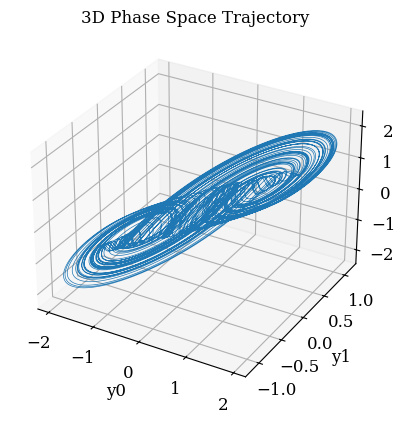

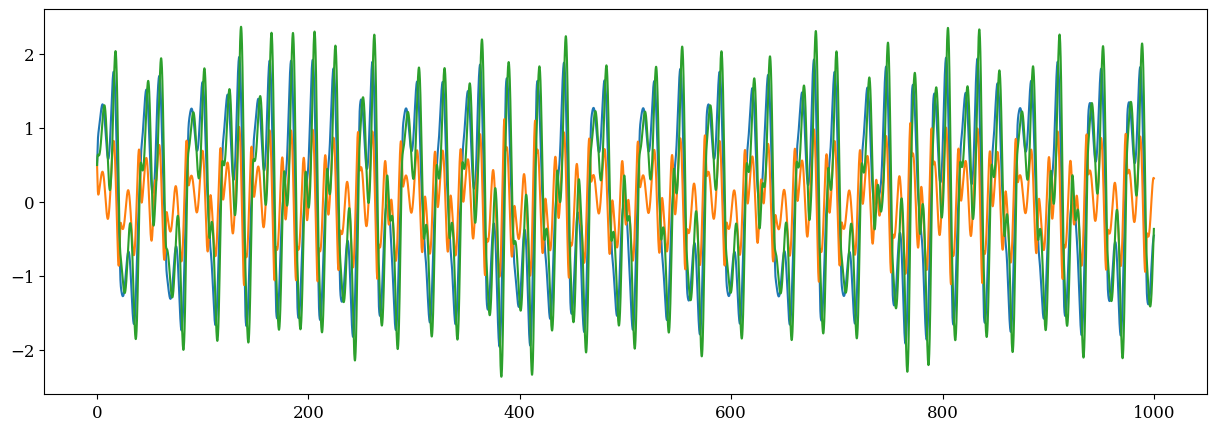

In [21]:
ts_np_rec = plot_trajectory(f, y0=initial_conditions, t_span=(0,1000), dt=0.01)

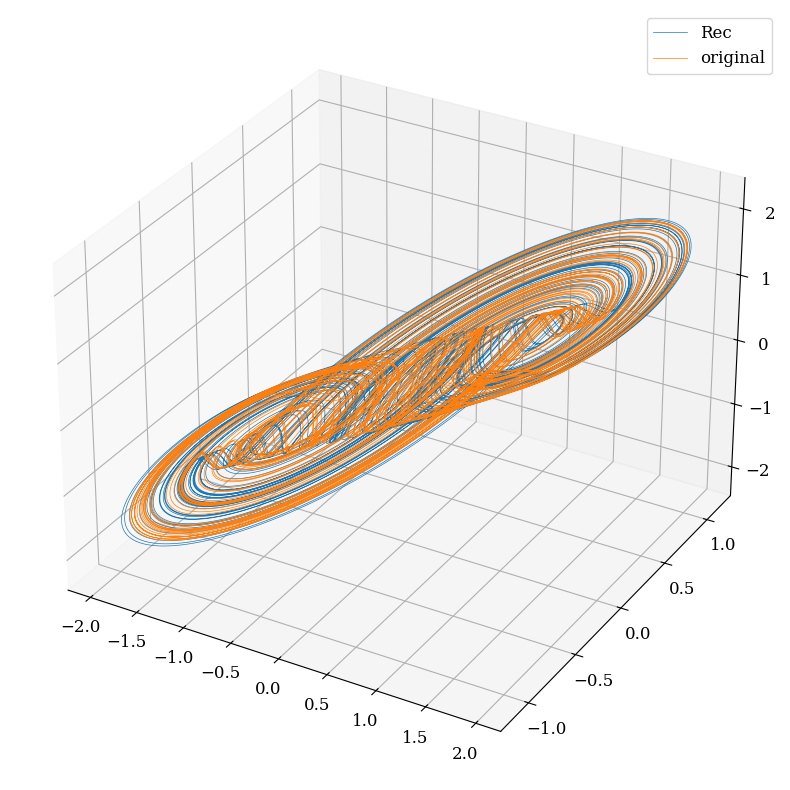

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.plot(ts_np_exp[:,0], ts_np_exp[:, 1], ts_np_exp[:, 2], lw=0.5,label='expanded')
ax.plot(ts_np_rec[:,0], ts_np_rec[:, 1], ts_np_rec[:, 2], lw=0.5,label='Rec')
ax.plot(ts_np_th[:,0], ts_np_th[:, 1], ts_np_th[:, 2], lw=0.5,label='original')
plt.legend(loc=1)

**Reconstructed Power Grid System**

- lyapunov exponents

In [23]:
f = [-6.36190889966571*y(0)*y(1) - 6.28669843371058*y(0)*y(2) - 5.24909247776923*y(0)*y(3) + 5.29970746493087*y(0)*y(4) + 2.45185782934786*y(0)*y(5) - 3.06928340286875*y(0)*y(6) - 9.85016716859662*y(0)**2*y(1) + 22.7258207608629*y(0)**2*y(2) + 22.0861046106522*y(0)**2*y(3) + 27.5440794905244*y(0)**2*y(4) - 20.5854408815512*y(0)**2*y(5) - 16.2908211046615*y(0)**2*y(6) + 3.50128607306909*y(1)*y(3) - 1.66016961550763*y(1)*y(5) + 2.68960608719103*y(1)*y(6) - 13.8029070191501*y(1)**2*y(3) - 9.606872788428*y(1)**2*y(5) + 6.58513929001422*y(1)**2*y(6) + 5.33100253315416*y(2)*y(1) + 14.3913533587269*y(2)*y(1)**2 + 0.324819844272396*y(2)*y(3) - 0.709497163892054*y(2)*y(4) - 0.199107109060292*y(2)*y(5) + 0.112933794492553*y(2)*y(6) + 3.09534997637762*y(2)**2*y(3) - 7.61158864677297*y(2)**2*y(4) + 2.1739981357671*y(2)**2*y(5) + 1.36121574939074*y(2)**2*y(6) - 0.235767447806117*y(3)*y(5) - 0.292383436660625*y(3)*y(6) + 7.19236134884674*y(3)**2*y(5) - 1.87600580607107*y(3)**2*y(6) - 1.99169700871798*y(4)*y(1) - 0.980828900503878*y(4)*y(1)**2 + 2.87641558272199*y(4)*y(3) + 3.20393158946213*y(4)*y(3)**2 - 0.344356917243747*y(4)*y(5) + 0.371213694503859*y(4)*y(6) + 7.32812899467024*y(4)**2*y(5) - 5.58971392531759*y(4)**2*y(6) - 0.117156635691886*y(6)*y(5) - 1.15916527876829*y(6)*y(5)**2 + 6.60501617188386*y(0)**2 - 0.756605542308773*y(1)**2 + 0.672152720017108*y(2)**2 - 0.495049494498314*y(3)**2 - 2.70600790309279*y(4)**2 + 0.0763094872430534*y(5)**2 + 0.150349053988239*y(6)**2 - 13.4232501282264*y(0) + 10.3654274133352*y(1) + 1.43124618715401*y(2) + 1.06100904501174*y(3) + 1.21872099999382*y(4) + 0.155167769326438*y(5) - 0.814604760154685*y(6), -9.315884968835*y(0)*y(1) + 3.15071101895014*y(0)*y(2) - 5.44916214097663*y(0)*y(3) + 7.18892992159468*y(0)*y(4) + 0.42829806180196*y(0)*y(5) + 2.12774527436844*y(0)*y(6) + 10.0721077788352*y(0)**2*y(1) - 9.57814254278205*y(0)**2*y(2) + 3.88213156664245*y(0)**2*y(3) + 6.10577194728204*y(0)**2*y(4) + 1.85049695703284*y(0)**2*y(5) + 2.71161594877768*y(0)**2*y(6) + 3.77620987776765*y(1)*y(3) - 0.699343352931661*y(1)*y(5) - 1.97964961876126*y(1)*y(6) + 2.81845940480856*y(1)**2*y(3) - 2.61911151431785*y(1)**2*y(5) + 30.1138214200431*y(1)**2*y(6) - 1.53492319614504*y(2)*y(1) + 11.9032221486613*y(2)*y(1)**2 + 1.31521708108183*y(2)*y(3) - 1.15531939579643*y(2)*y(4) - 0.0551786720892307*y(2)*y(5) - 1.08318147414839*y(2)*y(6) + 2.48900628601927*y(2)**2*y(3) - 10.3449600317174*y(2)**2*y(4) + 3.20477151382683*y(2)**2*y(5) - 1.84457064611373*y(2)**2*y(6) + 0.294304241389185*y(3)*y(5) - 0.960979846622843*y(3)*y(6) + 11.498277081744*y(3)**2*y(5) - 1.59871238636443*y(3)**2*y(6) - 7.8099780466979*y(4)*y(1) + 9.50612454535086*y(4)*y(1)**2 + 2.18652923204412*y(4)*y(3) + 30.6634164782651*y(4)*y(3)**2 + 0.299515026564488*y(4)*y(5) + 2.94419554993335*y(4)*y(6) + 6.1159447849591*y(4)**2*y(5) - 5.60292151608883*y(4)**2*y(6) + 0.305647483077359*y(6)*y(5) - 1.63581681064489*y(6)*y(5)**2 + 1.11728247625553*y(0)**2 + 8.66847384990944*y(1)**2 - 0.276738643146504*y(2)**2 - 0.625122842468814*y(3)**2 - 1.90394947446986*y(4)**2 - 0.280875572594422*y(5)**2 - 0.653985053117868*y(6)**2 + 24.8441185252163*y(0) - 30.8434951725899*y(1) + 0.265188506776308*y(2) + 2.40154086934683*y(3) + 1.56862683122671*y(4) + 0.216574603876095*y(5) + 1.51847203683136*y(6), -0.454390825786925*y(0)*y(1) + 5.81209577755159*y(0)*y(2) - 7.40956337457102*y(0)*y(3) + 0.552737829601764*y(0)*y(4) + 0.0912368222487857*y(0)*y(5) - 0.379434060911732*y(0)*y(6) + 0.446432413414613*y(0)**2*y(1) - 7.6946449370345*y(0)**2*y(2) + 2.34238884078111*y(0)**2*y(3) + 5.62981313500326*y(0)**2*y(4) + 1.47478729701069*y(0)**2*y(5) + 3.74173225660697*y(0)**2*y(6) + 2.39006316653419*y(1)*y(3) + 2.3370928861053*y(1)*y(5) + 0.0394880895754332*y(1)*y(6) + 9.69808638283146*y(1)**2*y(3) - 1.76129804167708*y(1)**2*y(5) + 15.3898383983198*y(1)**2*y(6) - 4.7597805427768*y(2)*y(1) + 5.91349514120968*y(2)*y(1)**2 + 3.39714141997493*y(2)*y(3) + 0.956574509637331*y(2)*y(4) + 0.230735023044983*y(2)*y(5) - 0.213028854092863*y(2)*y(6) - 8.67438321886199*y(2)**2*y(3) - 114.343826120117*y(2)**2*y(4) - 8.38416033024956*y(2)**2*y(5) - 4.64418274410629*y(2)**2*y(6) - 2.4845871285469*y(3)*y(5) - 1.98449389949899*y(3)*y(6) + 69.9074421415058*y(3)**2*y(5) + 5.60094083363966*y(3)**2*y(6) + 1.04578638554575*y(4)*y(1) - 6.81234307645949*y(4)*y(1)**2 + 2.60322233188121*y(4)*y(3) + 197.640109890473*y(4)*y(3)**2 - 1.56924367601944*y(4)*y(5) + 0.74194145863149*y(4)*y(6) + 38.3297821418721*y(4)**2*y(5) - 25.3682858341116*y(4)**2*y(6) + 0.64264303622008*y(6)*y(5) - 1.56210014296988*y(6)*y(5)**2 + 0.742962468437837*y(0)**2 - 0.237975788140355*y(1)**2 - 2.55878195836213*y(2)**2 + 1.72319174839844*y(3)**2 - 2.30785813631807*y(4)**2 + 0.423909330778365*y(5)**2 + 0.603317177568863*y(6)**2 + 9.31092447529476*y(0) + 6.27470555616434*y(1) - 47.7947175356813*y(2) + 15.1751479937182*y(3) + 15.1702278444287*y(4) - 0.149458339319353*y(5) + 2.01133066297292*y(6), 0.527260773154205*y(0)*y(1) + 0.335789104662395*y(0)*y(2) - 4.52901383914607*y(0)*y(3) + 4.80176680259432*y(0)*y(4) - 0.558764910668353*y(0)*y(5) - 1.06637015719624*y(0)*y(6) - 6.82760404763716*y(0)**2*y(1) + 0.402586781085249*y(0)**2*y(2) + 9.02674722805211*y(0)**2*y(3) + 4.19873388467254*y(0)**2*y(4) - 3.50909694131151*y(0)**2*y(5) - 0.604047786618314*y(0)**2*y(6) + 0.0441304263391308*y(1)*y(3) - 0.566308179137538*y(1)*y(5) + 0.839979043457199*y(1)*y(6) + 22.8027283393924*y(1)**2*y(3) - 5.88166205488181*y(1)**2*y(5) + 5.65314746637534*y(1)**2*y(6) - 0.247060925796013*y(2)*y(1) + 4.63602704691417*y(2)*y(1)**2 + 0.572416627733264*y(2)*y(3) - 2.60049680585703*y(2)*y(4) + 0.584186324651005*y(2)*y(5) - 0.121706511110965*y(2)*y(6) + 18.6754120540935*y(2)**2*y(3) - 10.3753589436011*y(2)**2*y(4) + 2.81070242992185*y(2)**2*y(5) - 4.33243907984881*y(2)**2*y(6) - 1.72611042961603*y(3)*y(5) + 0.476298917042038*y(3)*y(6) + 61.7148664875965*y(3)**2*y(5) + 12.9187078799107*y(3)**2*y(6) + 1.68509659924997*y(4)*y(1) + 5.21607463743648*y(4)*y(1)**2 + 1.21568861906608*y(4)*y(3) + 216.324833852466*y(4)*y(3)**2 + 2.3807528914176*y(4)*y(5) - 0.600865028235725*y(4)*y(6) + 0.168447641691742*y(4)**2*y(5) - 10.0358037331428*y(4)**2*y(6) + 0.0663085679721017*y(6)*y(5) + 0.0203047374928498*y(6)*y(5)**2 + 0.295534587206357*y(0)**2 - 1.05809275117829*y(1)**2 + 0.801037605336257*y(2)**2 + 1.84193779162533*y(3)**2 - 3.54149472756098*y(4)**2 - 0.0487640669719254*y(5)**2 + 0.201216893995196*y(6)**2 + 4.27570421060106*y(0) + 3.10193265578863*y(1) + 2.0123319797352*y(2) - 17.177264764004*y(3) + 9.3282152887225*y(4) - 3.06325979954714*y(5) + 1.48372564727949*y(6), -0.393553137959747*y(0)*y(1) + 0.985816776507542*y(0)*y(2) - 0.148974884421603*y(0)*y(3) + 1.0245994097134*y(0)*y(4) - 1.49713422307552*y(0)*y(5) - 0.40626229635639*y(0)*y(6) - 6.22932953550325*y(0)**2*y(1) - 0.0429504034304141*y(0)**2*y(2) + 9.00157985459949*y(0)**2*y(3) + 6.76589399404704*y(0)**2*y(4) - 4.54312810898451*y(0)**2*y(5) - 0.432372533243206*y(0)**2*y(6) + 6.07470620893941*y(1)*y(3) + 0.017980786911661*y(1)*y(5) + 1.80570450750277*y(1)*y(6) + 20.3146801924341*y(1)**2*y(3) - 2.34666386587952*y(1)**2*y(5) + 11.8448729582806*y(1)**2*y(6) + 1.17509278795447*y(2)*y(1) - 0.758187360331653*y(2)*y(1)**2 + 4.62308666444577*y(2)*y(3) - 5.73874728071386*y(2)*y(4) + 1.03886863189455*y(2)*y(5) - 0.083733317867722*y(2)*y(6) + 18.2727268743315*y(2)**2*y(3) - 21.0371770287093*y(2)**2*y(4) + 3.50753248265318*y(2)**2*y(5) - 6.06796429765209*y(2)**2*y(6) + 1.33421161408607*y(3)*y(5) + 0.0924350467223068*y(3)*y(6) + 40.9418279040155*y(3)**2*y(5) + 7.74511359840989*y(3)**2*y(6) - 5.67645884829325*y(4)*y(1) + 6.53167005944106*y(4)*y(1)**2 - 12.544465699446*y(4)*y(3) + 172.597328177114*y(4)*y(3)**2 - 1.72980526941924*y(4)*y(5) - 2.0813067174785*y(4)*y(6) - 1.65644257803151*y(4)**2*y(5) - 26.7780746723575*y(4)**2*y(6) + 0.521890809758496*y(6)*y(5) - 0.386885199584443*y(6)*y(5)**2 + 0.329254878321609*y(0)**2 - 1.40015586207524*y(1)**2 - 0.911793126946207*y(2)**2 + 0.225760622700943*y(3)**2 + 13.1475485399775*y(4)**2 + 0.178759078059303*y(5)**2 + 0.0358077961295418*y(6)**2 + 6.71052449981192*y(0) + 5.23575234098701*y(1) + 2.77787444736011*y(2) + 9.97010264517166*y(3) - 24.6216905800285*y(4) - 1.43604754250877*y(5) + 1.34255525229197*y(6), -0.924239907246551*y(0)*y(1) - 0.585530630682209*y(0)*y(2) - 1.57565766648884*y(0)*y(3) + 3.48047765242951*y(0)*y(4) + 0.0675089944594247*y(0)*y(5) - 0.251601728593367*y(0)*y(6) - 7.22328282437546*y(0)**2*y(1) + 0.633569305648317*y(0)**2*y(2) + 0.656946975754328*y(0)**2*y(3) + 7.22032895417567*y(0)**2*y(4) - 1.44863891322713*y(0)**2*y(5) + 2.94839818458298*y(0)**2*y(6) - 0.743460022620996*y(1)*y(3) - 1.71272810166741*y(1)*y(5) + 0.45323462449449*y(1)*y(6) + 29.0267685219254*y(1)**2*y(3) - 10.3053705638089*y(1)**2*y(5) - 8.33513370092467*y(1)**2*y(6) + 0.113304059090206*y(2)*y(1) + 9.86767198354482*y(2)*y(1)**2 - 2.26361953945162*y(2)*y(3) - 1.19721166465204*y(2)*y(4) - 2.70543599248306*y(2)*y(5) - 1.03685540581965*y(2)*y(6) + 9.868407021917*y(2)**2*y(3) - 54.4476296182528*y(2)**2*y(4) + 7.34388528076156*y(2)**2*y(5) - 2.21208628238686*y(2)**2*y(6) - 7.06442963857168*y(3)*y(5) + 0.683533786064769*y(3)*y(6) + 82.1500356948527*y(3)**2*y(5) + 6.28358549551579*y(3)**2*y(6) + 1.96039214735294*y(4)*y(1) - 1.57001859465681*y(4)*y(1)**2 + 5.69304545991647*y(4)*y(3) + 224.35355326027*y(4)*y(3)**2 + 8.16543858278366*y(4)*y(5) - 0.727577448112983*y(4)*y(6) + 42.6607760009577*y(4)**2*y(5) - 18.0899311922948*y(4)**2*y(6) + 1.12800654351473*y(6)*y(5) - 1.71525306743225*y(6)*y(5)**2 - 0.0251988563852276*y(0)**2 + 0.496433806747779*y(1)**2 + 3.87300223694667*y(2)**2 + 2.53227200562184*y(3)**2 - 9.10738245147865*y(4)**2 + 1.35317429929118*y(5)**2 - 0.08650758549825*y(6)**2 + 4.84637355953989*y(0) + 2.32685129173332*y(1) - 3.99191304471348*y(2) + 17.4103338292227*y(3) + 20.8877946698522*y(4) - 43.2218097382574*y(5) + 1.545014136059*y(6), 0.708189736942606*y(0)*y(1) + 3.63393505683727*y(0)*y(2) - 18.4666409559431*y(0)*y(3) + 1.37429775098244*y(0)*y(4) - 0.343341130082928*y(0)*y(5) + 12.0963636025191*y(0)*y(6) + 12.2801219118271*y(0)**2*y(1) - 8.87522868194692*y(0)**2*y(2) + 10.6296187715469*y(0)**2*y(3) + 5.8290982229513*y(0)**2*y(4) - 0.0501367315383646*y(0)**2*y(5) + 1.9218185778844*y(0)**2*y(6) + 17.8763080092983*y(1)*y(3) + 0.106975555980738*y(1)*y(5) - 10.4330035888707*y(1)*y(6) + 40.509650464698*y(1)**2*y(3) - 1.03119009938339*y(1)**2*y(5) - 4.19176147063838*y(1)**2*y(6) - 3.82075531648239*y(2)*y(1) + 2.21270713010808*y(2)*y(1)**2 + 0.534679177845062*y(2)*y(3) - 0.75972231347893*y(2)*y(4) - 0.359452699685766*y(2)*y(5) - 0.26828973073192*y(2)*y(6) + 10.000623977997*y(2)**2*y(3) + 1.27988246870298*y(2)**2*y(4) - 5.36339429038529*y(2)**2*y(5) + 0.635255639803765*y(2)**2*y(6) - 0.733547436697344*y(3)*y(5) - 2.56054431963174*y(3)*y(6) + 32.8774561987519*y(3)**2*y(5) - 12.2225001391262*y(3)**2*y(6) - 2.81212432476657*y(4)*y(1) - 20.2954725245956*y(4)*y(1)**2 + 5.04364037649622*y(4)*y(3) + 149.224276723561*y(4)*y(3)**2 + 1.04249558165377*y(4)*y(5) + 1.51569584056394*y(4)*y(6) + 6.36800279833563*y(4)**2*y(5) - 32.7667115139216*y(4)**2*y(6) - 0.596956055679454*y(6)*y(5) - 2.59826077103487*y(6)*y(5)**2 + 1.12569703369551*y(0)**2 - 1.18047240562243*y(1)**2 + 0.67157377358519*y(2)**2 - 0.832378302473204*y(3)**2 - 2.87965996662733*y(4)**2 + 0.429501624585344*y(5)**2 - 0.0868401914876703*y(6)**2 + 33.8283882024773*y(0) - 4.01756054433588*y(1) + 1.12063000940045*y(2) + 9.71102508866651*y(3) + 6.87038115421739*y(4) + 0.304351205615178*y(5) - 47.9984757970857*y(6)]


initial_conditions =np.random.rand(7) /10000
t_span = np.arange(0.00001, 36*60*60,0.2)
time_step = 0.02
lyaps_PG=LE(f=f, initial_state=initial_conditions, tspan=t_span)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent: -0.0160 ± 0.0000
2. Lyapunov exponent: -14.3030 ± 0.0000
3. Lyapunov exponent: -30.6884 ± 0.0000
4. Lyapunov exponent: -42.6976 ± 0.0000
5. Lyapunov exponent: -44.5244 ± 0.0042
6. Lyapunov exponent: -44.5244 ± 0.0042
7. Lyapunov exponent: -48.3255 ± 0.0000


- KD dimentions

In [24]:
KD(np.mean(lyaps_PG[1000:,:],axis=0))

attractor
D= 0


- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


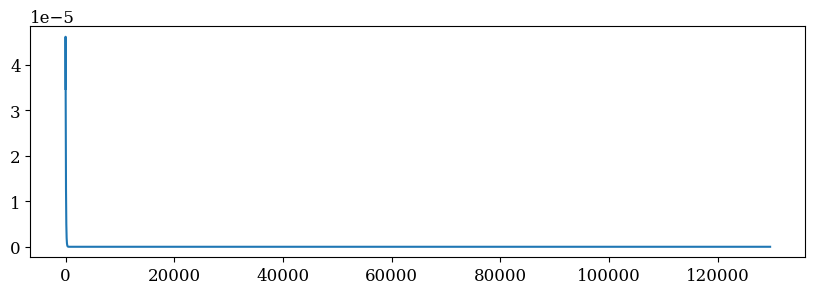

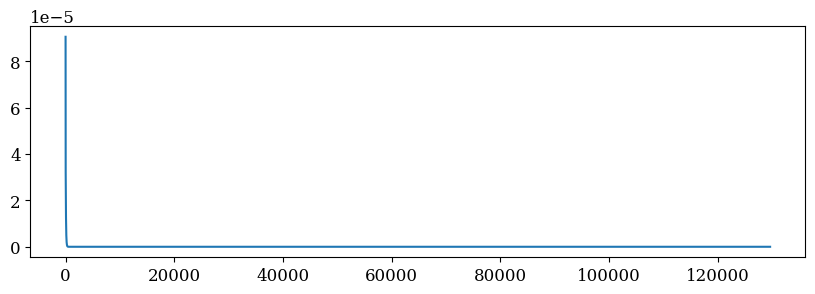

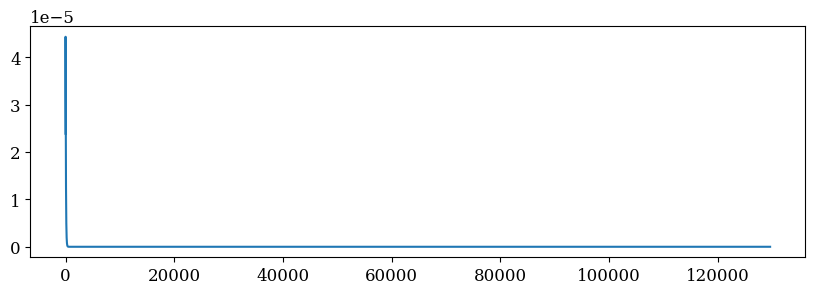

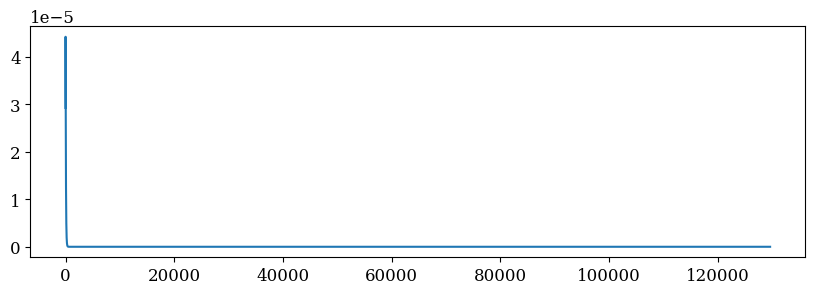

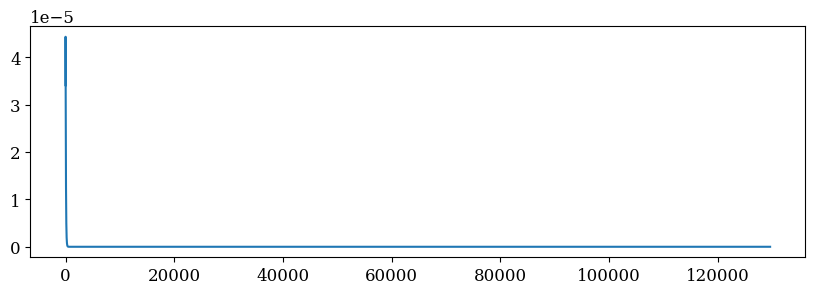

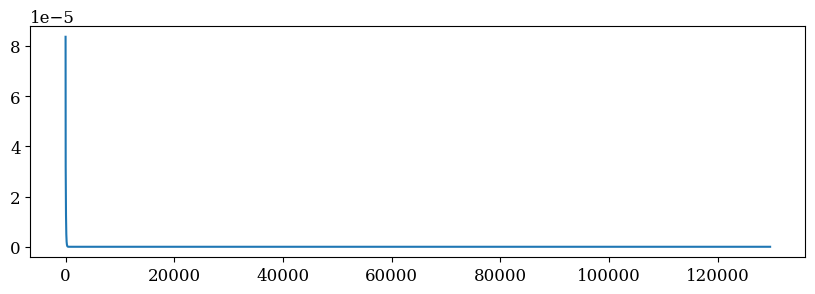

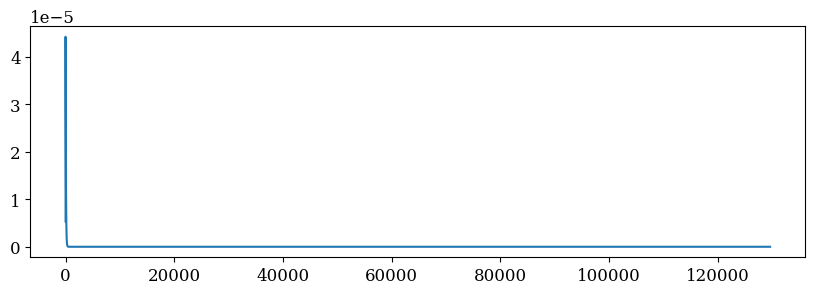

In [25]:
ts_PG = plot_trajectory(f, y0=initial_conditions, t_span=(0.00001, 36*60*60)
, dt=0.02)

**2d Tipping**

**- Original system**

- lyapunov exponents

In [26]:
f= [0.79 - y(0)**3 + y(0), 0.3*(-1 + y(0)) - y(1)**3 + y(1)]

initial_conditions = np.random.rand(2)
dt = 0.01
tspan = np.arange(0.00001, 10000, dt)
lyaps_tip2_th=LE(f,initial_conditions,tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent: -2.2366 ± 0.0000
2. Lyapunov exponent: -3.8617 ± 0.0000


- KD dimentions

In [27]:
KD(np.mean(lyaps_tip2_th[1000:,:],axis=0))

attractor
D= 0


- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


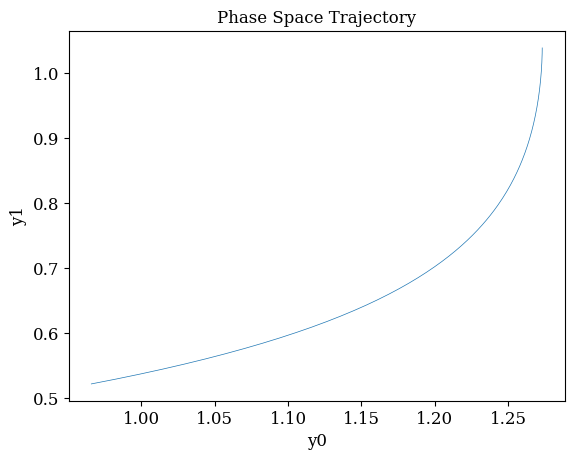

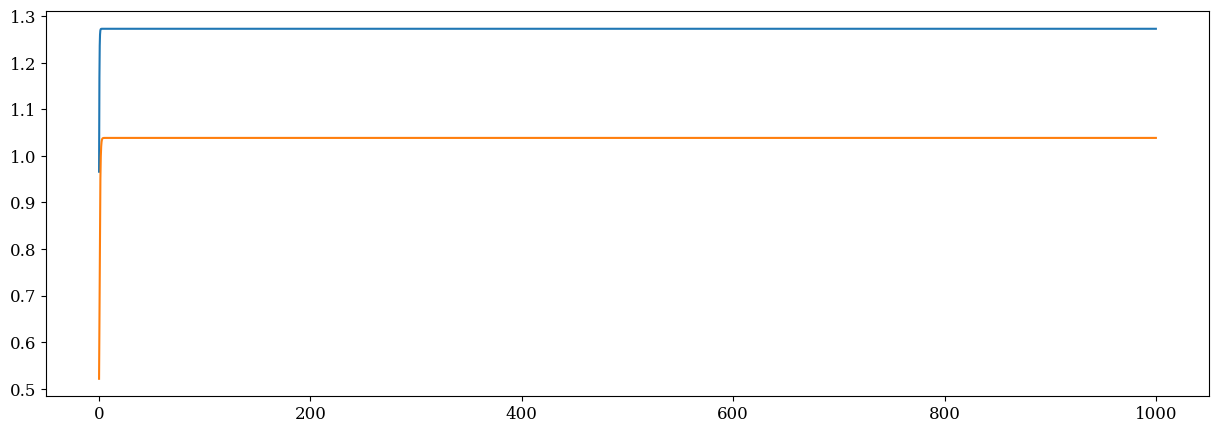

In [28]:
ts_tip2_th = plot_trajectory(f, y0=initial_conditions, t_span=(0,1000), dt=0.01)

**10d Tipping**

**- Original system**

- lyapunov exponents

In [29]:
f= [0.3*(-1 + y(4)) - y(0)**3 + y(0),
 0.3*(-2 + y(0) + y(3)) - y(1)**3 + y(1),
 0.3*(-3 + y(1) + y(3) + y(4)) - y(2)**3 + y(2),
 0.3*(-2 + y(0) + y(9)) - y(3)**3 + y(3),
 0.79 + 0.3*(-1 + y(1)) - y(4)**3 + y(4),
 0.3*(-2 + y(4) + y(7)) - y(5)**3 + y(5),
 0.3*(-1 + y(4)) - y(6)**3 + y(6),
 0.3*(-2 + y(0) + y(6)) - y(7)**3 + y(7),
 0.3*(-2 + y(2) + y(7)) - y(8)**3 + y(8),
 0.3*(-1 + y(4)) - y(9)**3 + y(9)]

initial_conditions = np.random.rand(10)
dt = 0.01
tspan = np.arange(0.00001, 10000, dt)
lyaps_tip10_th=LE(f,initial_conditions,tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent: -1.8836 ± 0.0000
2. Lyapunov exponent: -2.0470 ± 0.0000
3. Lyapunov exponent: -2.0688 ± 0.0000
4. Lyapunov exponent: -2.2368 ± 0.0000
5. Lyapunov exponent: -2.2370 ± 0.0000
6. Lyapunov exponent: -2.2372 ± 0.0001
7. Lyapunov exponent: -2.2371 ± 0.0001
8. Lyapunov exponent: -2.2469 ± 0.0000
9. Lyapunov exponent: -2.2521 ± 0.0000
10. Lyapunov exponent: -3.8600 ± 0.0000


- KD dimentions

In [30]:
KD(np.mean(lyaps_tip10_th[1000:,:],axis=0))

attractor
D= 0


- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


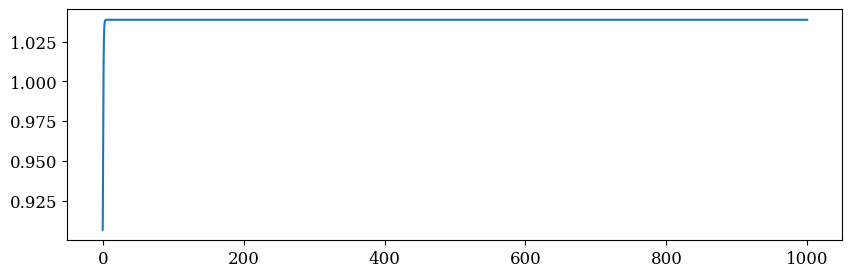

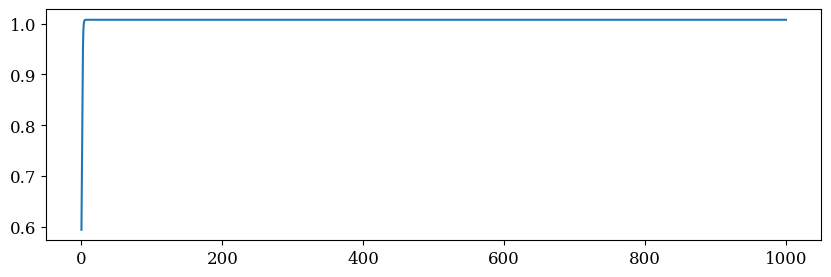

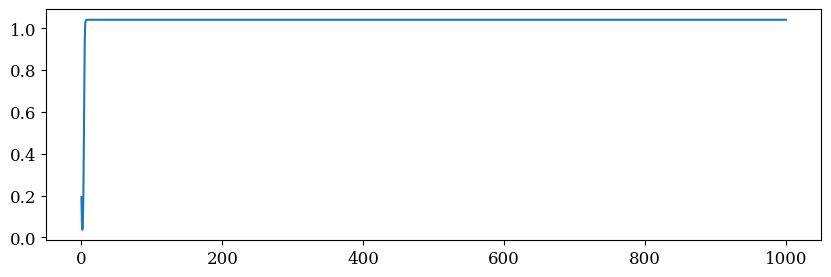

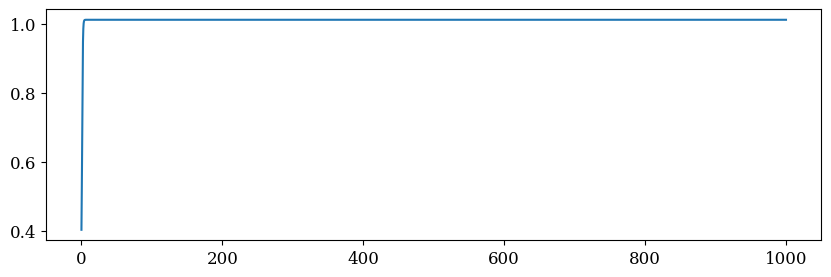

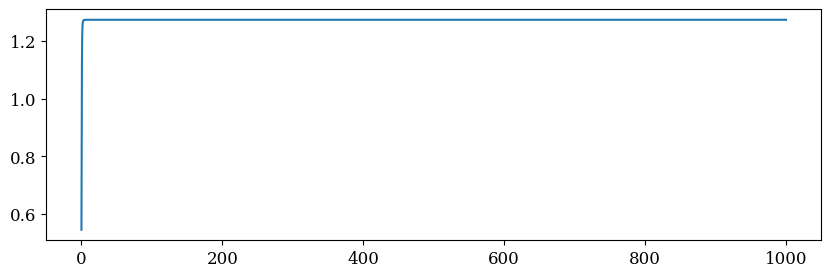

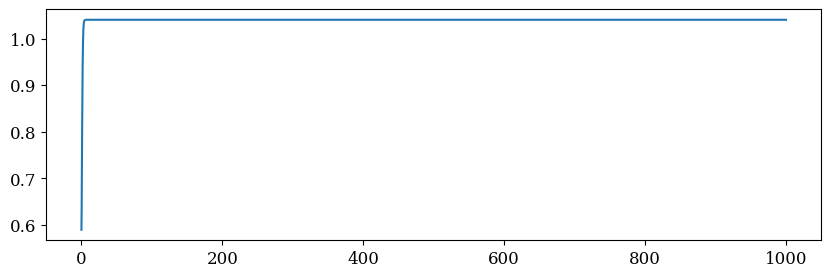

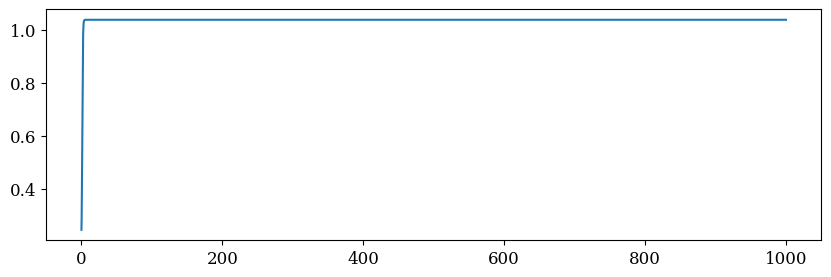

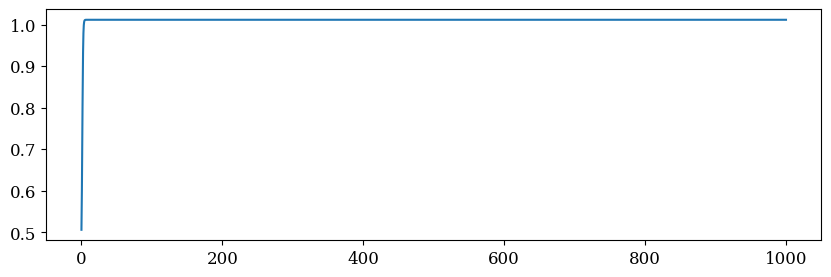

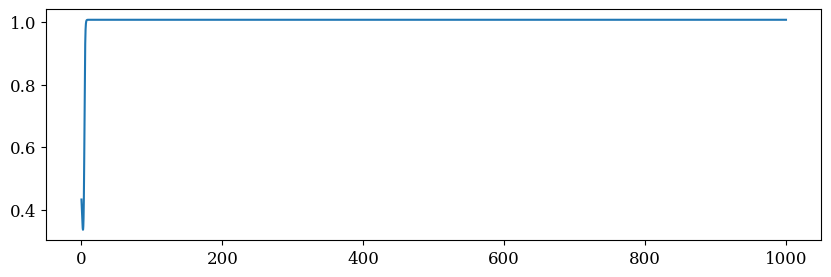

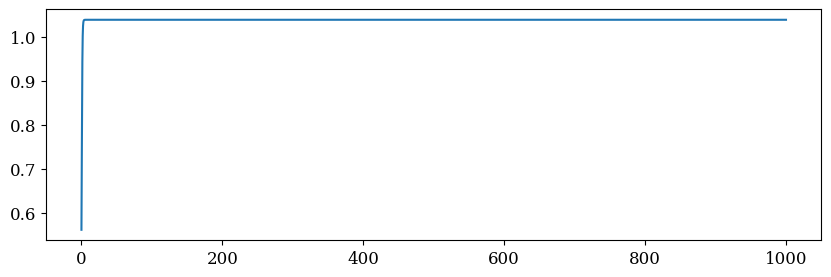

In [31]:
ts_tip10_th = plot_trajectory(f, y0=initial_conditions, t_span=(0,1000), dt=0.01)

**10d Lorenz96 Model(chaotic)**

**- Original System**

In [32]:
def lorenz96(N, F): # N: dimention
    equations =[]
    for i in range(N):
        im1 = (i - 1) % N
        ip1 = (i + 1) % N
        im2 = (i - 2) % N

        equation = -y(im1) * (y(im2) - y(ip1)) - y(i) + F
        equations.append(equation)
    return equations

+ lyapunov exponents

In [33]:
F=8
N=10
f=lorenz96(N,F)
tspan = np.arange(0.00001,10000,0.01)
i_s=np.random.rand(N)

lyaps_L96_N10_th8 = LE(f, initial_state=i_s, tspan=tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent:  1.1867 ± 0.0017
2. Lyapunov exponent:  0.6872 ± 0.0018
3. Lyapunov exponent:  0.0977 ± 0.0018
4. Lyapunov exponent: -0.0019 ± 0.0016
5. Lyapunov exponent: -0.4323 ± 0.0015
6. Lyapunov exponent: -0.8737 ± 0.0014
7. Lyapunov exponent: -1.3260 ± 0.0014
8. Lyapunov exponent: -1.9286 ± 0.0015
9. Lyapunov exponent: -2.8061 ± 0.0017
10. Lyapunov exponent: -4.6030 ± 0.0018


+ Kaplan-Yorke dimention

In [34]:
KD(np.mean(lyaps_L96_N10_th8[1000:,:],axis=0))

6.511278195488722

+ Trajectory and time series

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


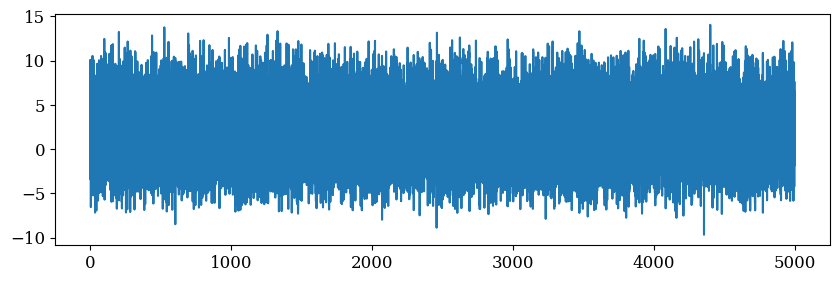

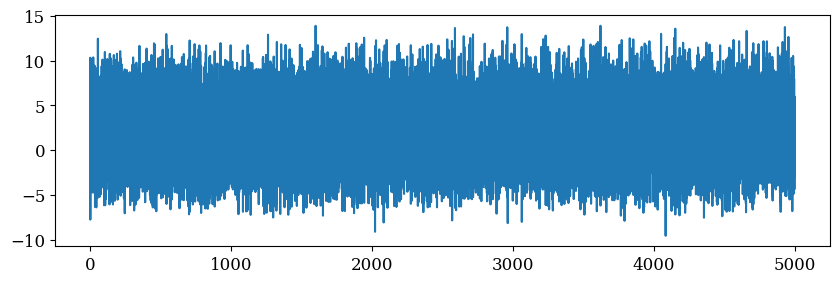

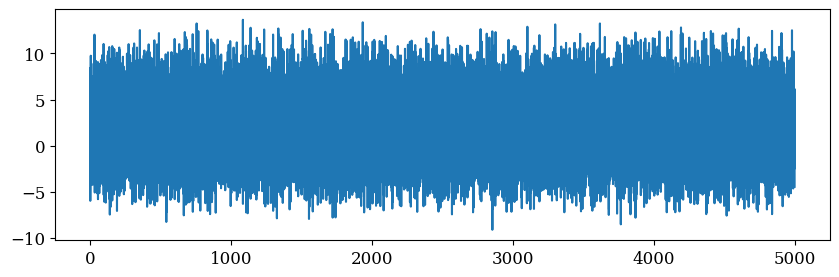

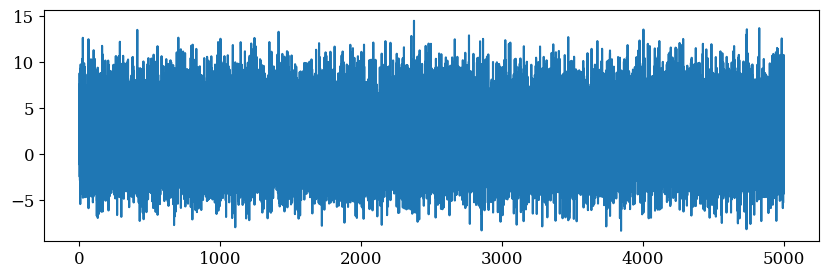

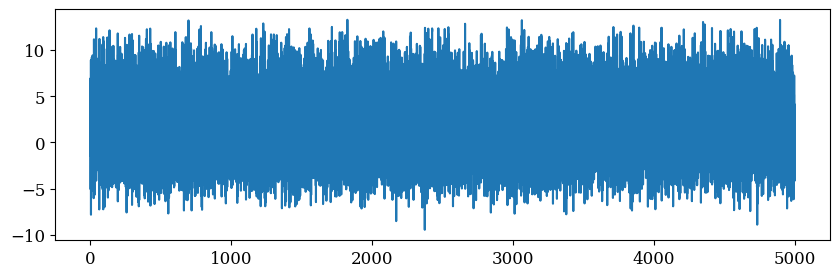

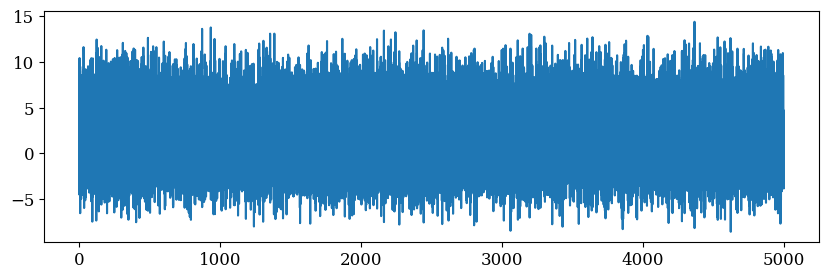

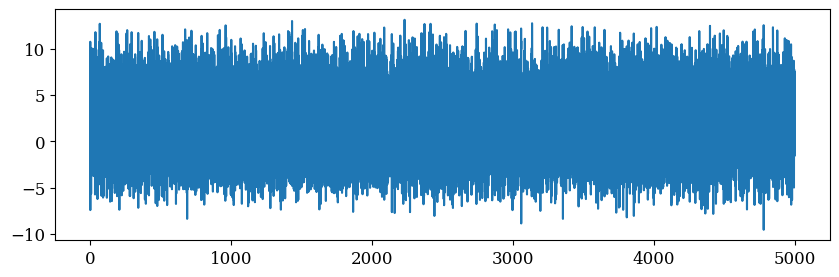

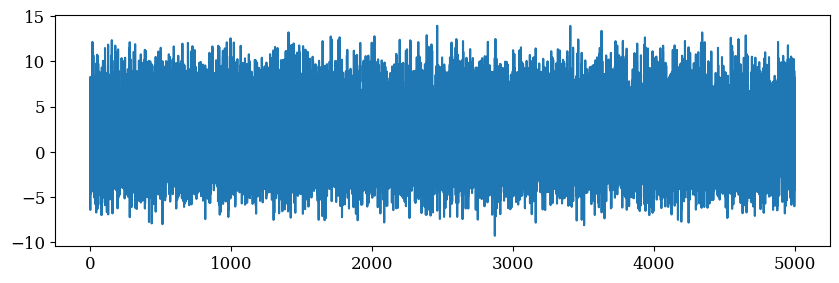

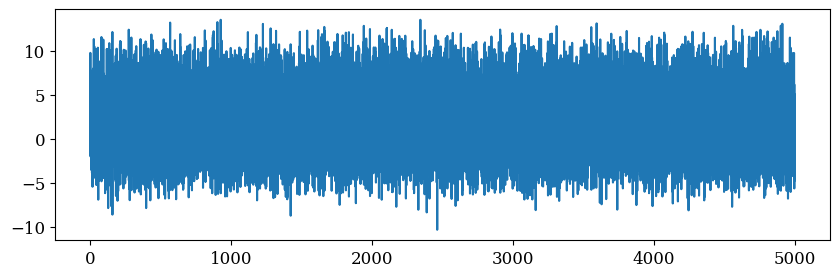

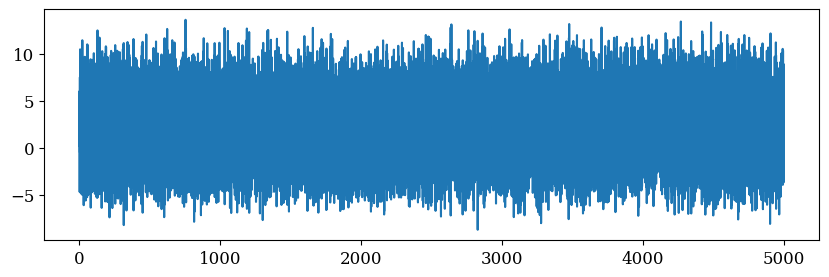

In [35]:
ts_L96_N10_th8 = plot_trajectory(f, y0=i_s, t_span=(0,5000), dt=0.05)

Text(0.5, 0, 'x3')

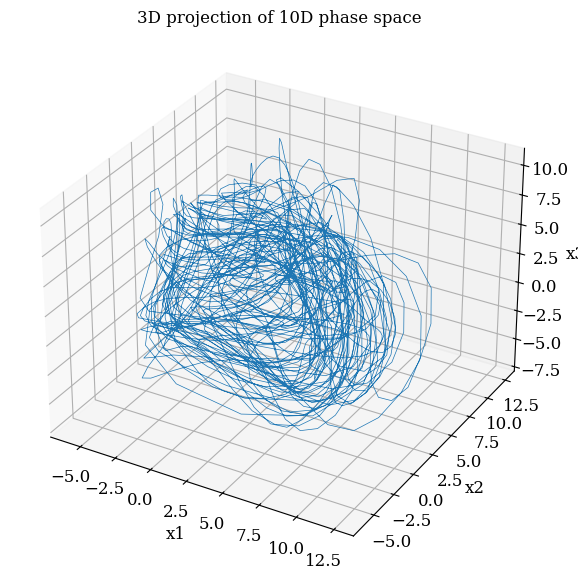

In [47]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(ts_L96_N10_th8[1000:3000, 0], ts_L96_N10_th8[1000:3000, 1], ts_L96_N10_th8[1000:3000, 2], lw=0.5)
plt.title('3D projection of 10D phase space')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

**- Reconstructed System**

+ lyapunov exponents

In [36]:
# F=8

f=[8.19461536052336 + 0.00326025481126608*y(0)*y(1) + 0.005136139017728*y(0)*y(2) + 0.00380532964935848*y(0)*y(3) + 0.00162628022496527*y(0)*y(4) - 0.00108546219558691*y(0)*y(5) + 0.0014388164972734*y(0)*y(6) - 0.00334543445163754*y(0)*y(7) - 0.00254555371611417*y(0)*y(8) - 0.0071901799318943*y(0)*y(9) - 0.00130308583747179*y(1)*y(5) - 0.00259276337904868*y(1)*y(8) + 0.998632089387608*y(1)*y(9) - 0.00141357226202825*y(2)*y(8) + 0.00405706487235998*y(2)*y(9) - 0.00114604646375569*y(3)*y(5) + 0.00224216558947586*y(3)*y(8) + 0.00189387505333487*y(3)*y(9) + 0.00109239619775094*y(4)*y(5) + 0.00438874429495593*y(6)*y(8) + 0.00381781169674266*y(7)*y(6) + 0.00167887102769595*y(9)*y(6) - 1.00008165433188*y(9)*y(8) + 0.00348481946689238*y(0)**2 + 0.00290925649468928*y(1)**2 + 0.00092503752292039*y(2)**2 + 0.00242610740155571*y(7)**2 + 0.00653756961532309*y(8)**2 - 0.00675542198141316*y(9)**2 - 1.09017419755054*y(0) - 0.01415338899855*y(1) - 0.0264734475487377*y(2) - 0.0159199895413493*y(3) - 0.0197815906477455*y(6) - 0.034306772411003*y(8) + 0.0345464189220939*y(9), 8.08931860676107 - 0.00934677091998679*y(0)*y(1) + 0.999344662224171*y(0)*y(2) + 0.0029368381118465*y(0)*y(3) - 0.00102816470580535*y(0)*y(5) + 0.00109145250743179*y(0)*y(7) - 1.00133456170327*y(0)*y(9) + 0.00652660230204883*y(1)*y(3) + 0.00224154150020376*y(1)*y(5) + 0.00265984735722386*y(1)*y(7) - 0.00308062588495598*y(1)*y(8) + 0.00183497627449322*y(2)*y(1) - 0.00366407944355669*y(2)*y(9) + 0.000766382458380486*y(3)*y(7) - 0.00161218540409559*y(3)*y(9) + 0.00270303882694156*y(4)*y(1) + 0.00181569933726433*y(4)*y(5) - 0.00125005228931163*y(4)*y(6) + 0.00261846158468169*y(4)*y(9) + 0.00225921011489596*y(7)*y(8) + 0.00486362334602628*y(7)*y(9) - 0.0060185944147028*y(0)**2 + 0.00503629930208886*y(1)**2 + 0.00370612439051774*y(2)**2 + 0.00165640927426465*y(3)**2 + 0.00107067063771709*y(5)**2 - 0.00102259471644441*y(6)**2 + 0.000932815741909871*y(7)**2 + 0.00417099023806204*y(8)**2 + 0.00665667232809051*y(9)**2 + 0.049215814032914*y(0) - 1.09606108094582*y(1) - 0.0158783511671943*y(2) - 0.0260715414335763*y(3) - 0.0178365232033457*y(4) - 0.0163481673406164*y(5) + 0.0122500932725308*y(6) - 0.0272151558546258*y(7) - 0.0126867451549942*y(8) - 0.0351021341958824*y(9), 8.17719763595664 - 1.00009364222382*y(0)*y(1) - 0.00254972576066674*y(0)*y(2) - 0.00274000102565189*y(0)*y(3) - 0.00171961636174855*y(0)*y(4) + 0.00127628771966337*y(0)*y(5) + 0.00447223645574217*y(0)*y(8) + 0.998391960107294*y(1)*y(3) + 0.00179035347194547*y(1)*y(5) + 0.00117447120091103*y(1)*y(7) + 0.00141250193535941*y(1)*y(8) + 0.00141893268165042*y(1)*y(9) - 0.00887768846166167*y(2)*y(1) + 0.00330048755262377*y(2)*y(3) + 0.00542572523282372*y(2)*y(4) + 0.00382603935535043*y(2)*y(5) + 0.0014928180192471*y(2)*y(6) + 0.0011041542582078*y(2)*y(8) - 0.0032517298530512*y(2)*y(9) + 0.00142185669801795*y(3)*y(5) + 0.003464926276994*y(4)*y(1) + 0.00107280142611033*y(7)*y(6) + 0.00163646949580845*y(9)*y(8) + 0.00645834226972508*y(0)**2 - 0.0059369957347853*y(1)**2 + 0.00432385189523282*y(2)**2 + 0.00385807031708926*y(3)**2 + 0.00104099583647127*y(4)**2 + 0.000843179441554067*y(5)**2 + 0.00386184638460545*y(9)**2 - 0.0313757859395759*y(0) + 0.0307724986083208*y(1) - 1.09085361516107*y(2) - 0.0234589907250964*y(3) - 0.0207253957072759*y(4) - 0.0264385778695692*y(5) - 0.0137961249393594*y(6) - 0.0206397652898811*y(8) - 0.0221388017365228*y(9), 8.11274843205974 - 0.00261985189410406*y(0)*y(3) - 0.0012281592587087*y(0)*y(7) - 0.00105496680924965*y(0)*y(8) + 0.00263290470882316*y(0)*y(9) - 0.00221952937744958*y(1)*y(3) - 0.00108707157238415*y(1)*y(5) + 0.00207553979814048*y(1)*y(6) + 0.00492110148210879*y(1)*y(9) - 0.999739436192359*y(2)*y(1) - 0.00863207953406439*y(2)*y(3) + 0.997667346037411*y(2)*y(4) + 0.00343940932388297*y(2)*y(5) + 0.00693993379127361*y(3)*y(5) + 0.00504580906133063*y(3)*y(6) + 0.00235701166530146*y(3)*y(7) + 0.00183603743346287*y(3)*y(9) - 0.00415269088468299*y(4)*y(1) + 0.00269994480499256*y(4)*y(3) + 0.00201676123481651*y(7)*y(5) - 0.00102390292228068*y(8)*y(5) + 0.00113528041527875*y(9)*y(5) - 0.00127008675572432*y(9)*y(8) + 0.00266395925737978*y(0)**2 + 0.00615487856940691*y(1)**2 - 0.00617731848000667*y(2)**2 + 0.00468276993045277*y(3)**2 + 0.00292363555800432*y(4)**2 + 0.00234040958779153*y(5)**2 + 0.000704856517216575*y(7)**2 + 0.00109865051066014*y(9)**2 - 0.0285585336994469*y(1) + 0.0460537457148781*y(2) - 1.104924322738*y(3) - 0.00860363290248411*y(4) - 0.0367744754074621*y(5) - 0.0200532598782056*y(6) + 0.0170969365676301*y(8) - 0.0207795983615705*y(9), 8.16078304302328 + 0.00323850364385831*y(0)*y(1) + 0.00388655664773116*y(0)*y(2) + 0.00172214321084021*y(0)*y(3) + 0.00258281883220854*y(0)*y(4) + 0.00145341515003473*y(0)*y(6) - 0.00148101567519852*y(1)*y(8) + 0.00158693410534103*y(2)*y(1) - 0.999457195356841*y(2)*y(3) - 0.00249560000877052*y(2)*y(4) - 0.00274107019818881*y(2)*y(5) + 0.00201490122941599*y(2)*y(7) + 0.997952802077883*y(3)*y(5) + 0.00303229815274745*y(3)*y(6) + 0.00128132406354467*y(3)*y(7) - 0.0010413519776008*y(3)*y(8) - 0.00350762805364294*y(4)*y(1) - 0.00726848252331935*y(4)*y(3) + 0.00334403862677063*y(4)*y(5) + 0.00694388919311198*y(4)*y(6) + 0.00400335063961234*y(4)*y(7) + 0.00226973038994187*y(4)*y(8) + 0.00198994003501419*y(6)*y(8) + 0.000960630339057706*y(7)*y(6) + 0.0031119732963515*y(1)**2 + 0.0060892657753957*y(2)**2 - 0.006643593657051*y(3)**2 + 0.00410116690209224*y(4)**2 + 0.00320802487636476*y(5)**2 + 0.00223570918586613*y(6)**2 - 0.0262534846454737*y(0) - 0.0389278561957722*y(2) + 0.0420955718943091*y(3) - 1.10033457410827*y(4) - 0.0173122661330413*y(5) - 0.0368992631003908*y(6) - 0.0168605764140052*y(7) - 0.0106217589564274*y(8), 8.18154922815165 - 0.000994025735093169*y(0)*y(5) - 0.000894420193279126*y(0)*y(9) + 0.00308272254495876*y(1)*y(3) + 0.00256603048155855*y(1)*y(5) + 0.000789050193245674*y(1)*y(7) + 0.00286111391521401*y(2)*y(1) - 0.0034595814710727*y(2)*y(5) - 0.00196977676219962*y(3)*y(5) - 0.00313420169693116*y(3)*y(6) - 0.00203217964179291*y(3)*y(7) + 0.00236585884034457*y(3)*y(8) + 0.00123879908317835*y(4)*y(1) - 1.00026128631094*y(4)*y(3) - 0.00696903581683464*y(4)*y(5) + 0.997573413233757*y(4)*y(6) + 0.00375706685911591*y(4)*y(7) + 0.00158980387349323*y(4)*y(8) - 0.00133668429667908*y(4)*y(9) + 0.00277528494865976*y(6)*y(5) + 0.00561043673686166*y(7)*y(5) + 0.0010743774608296*y(7)*y(6) + 0.00269913923622754*y(8)*y(5) + 0.00254093916950605*y(9)*y(5) + 0.00102827921531745*y(1)**2 + 0.00295760623636815*y(2)**2 + 0.00480920933742368*y(3)**2 - 0.00709916666957638*y(4)**2 + 0.00359040304541698*y(5)**2 + 0.00282373158302398*y(6)**2 + 0.000700724340369624*y(7)**2 - 0.0256159715085769*y(1) - 0.0215896882861804*y(3) + 0.0452859023223255*y(4) - 1.09434738102774*y(5) - 0.0115057225152972*y(6) - 0.0241451670798137*y(7) - 0.0194574134644536*y(8), 8.09986147143141 - 0.00151671065962215*y(0)*y(5) + 0.00196170423647397*y(0)*y(6) - 0.00107175640925879*y(0)*y(7) - 0.00104902290844078*y(1)*y(6) + 0.00423649731275082*y(2)*y(3) + 0.00378366854194418*y(2)*y(4) + 0.00102717815273076*y(2)*y(5) + 0.00267675374544159*y(2)*y(6) + 0.00115770048621085*y(2)*y(8) - 0.00312900886586113*y(3)*y(6) + 0.00100292797873844*y(4)*y(3) - 0.999436707527514*y(4)*y(5) - 0.00146485805505499*y(4)*y(6) - 0.00413284467584625*y(4)*y(7) - 0.00157102840721903*y(4)*y(8) + 0.00157785149112221*y(4)*y(9) - 0.0074034089324072*y(6)*y(5) + 0.00535941781310734*y(6)*y(8) + 0.999462995279727*y(7)*y(5) + 0.00196292728765976*y(7)*y(6) + 0.002259898791858*y(8)*y(5) + 0.00126580444166097*y(9)*y(5) + 0.00348650134806572*y(9)*y(6) + 0.000771632365334597*y(1)**2 + 0.000888780706027578*y(2)**2 + 0.00287456729251676*y(3)**2 + 0.00509801319294376*y(4)**2 - 0.00645165888948416*y(5)**2 + 0.00415087058408934*y(6)**2 + 0.003463100335051*y(7)**2 + 0.00073094753855352*y(8)**2 - 0.0282799260147091*y(2) - 0.0117682342242416*y(3) - 0.0237873488229765*y(4) + 0.0416082243429203*y(5) - 1.09250874021838*y(6) - 0.00971532142571186*y(7) - 0.0144258590795947*y(8) - 0.0120565490299598*y(9), 8.15259231122744 + 0.00183918796092842*y(0)*y(5) + 0.00123988837080518*y(0)*y(6) + 0.00420158178099802*y(0)*y(7) + 0.00128066466896122*y(0)*y(9) - 0.00120463127810209*y(1)*y(6) + 0.00257997026295851*y(1)*y(7) + 0.00134415759330847*y(1)*y(9) + 0.00128301525457918*y(2)*y(1) - 0.00113705985809551*y(2)*y(7) + 0.00386884657699454*y(3)*y(5) + 0.00189492662733932*y(3)*y(7) - 0.000961507781866269*y(3)*y(8) + 0.00107014646515909*y(3)*y(9) - 0.00197311210166614*y(4)*y(1) + 0.00286032187846464*y(4)*y(3) - 0.00247886892106609*y(4)*y(7) - 1.00023215514696*y(6)*y(5) + 0.997902365809779*y(6)*y(8) - 0.00222351732284166*y(7)*y(5) - 0.00743623638004641*y(7)*y(6) + 0.00303680764560265*y(7)*y(8) + 0.00629521802560736*y(7)*y(9) - 0.0031982962155032*y(8)*y(5) - 0.00158068823252073*y(9)*y(5) + 0.00344626636465355*y(9)*y(6) + 0.000631772344125323*y(0)**2 + 0.00317136215181235*y(4)**2 + 0.00597011917840238*y(5)**2 - 0.00717611742872195*y(6)**2 + 0.00419648114702344*y(7)**2 + 0.00264902522069787*y(8)**2 + 0.00108219441511915*y(9)**2 - 0.0240932462288234*y(0) + 0.0114023192146862*y(2) - 0.0145556119990756*y(3) - 0.0117249617721094*y(4) - 0.0274308496061504*y(5) + 0.047604070606741*y(6) - 1.10422425568863*y(7) - 0.029160798611596*y(9), 8.12498497751539 + 0.00108163221083497*y(0)*y(4) - 0.00183709548787645*y(0)*y(6) + 0.00366920747486946*y(0)*y(7) + 0.00554908220481373*y(0)*y(8) + 0.00178004544574361*y(1)*y(6) + 0.00337632386514805*y(1)*y(8) - 0.00140656808460753*y(2)*y(7) + 0.00193901928706298*y(2)*y(8) + 0.00241212290411119*y(4)*y(5) + 0.00383479417699686*y(4)*y(6) + 0.000939269670282611*y(4)*y(7) + 0.00199361418399132*y(4)*y(8) - 0.00196842997580148*y(6)*y(8) - 1.0004586758612*y(7)*y(6) - 0.00711056067460409*y(7)*y(8) + 0.997975675556273*y(7)*y(9) - 0.00186014894289063*y(8)*y(5) - 0.00303691051761895*y(9)*y(6) + 0.00202833708765957*y(9)*y(8) + 0.00137312070673012*y(0)**2 + 0.00282526665786684*y(5)**2 + 0.00608123973431753*y(6)**2 - 0.00643166109200658*y(7)**2 + 0.00389873211913*y(8)**2 + 0.00345019180350502*y(9)**2 - 0.0277142427283402*y(0) - 0.0122012049404971*y(1) - 0.013463098403324*y(4) - 0.0238846937724191*y(6) + 0.0440514119307855*y(7) - 1.0992201588905*y(8) - 0.0105163076692059*y(9), 8.11592653485708 - 0.00107047045391315*y(0)*y(5) - 0.00247082895129695*y(0)*y(7) + 0.997726922663231*y(0)*y(8) + 0.00394270484165768*y(0)*y(9) - 0.00211661081121127*y(1)*y(7) + 0.00352742069006722*y(1)*y(8) + 0.00622484348693717*y(1)*y(9) - 0.00108216424238463*y(2)*y(5) + 0.00139755097078517*y(2)*y(7) + 0.00206116886743607*y(2)*y(8) + 0.00308364221393379*y(2)*y(9) + 0.00137484558062144*y(3)*y(9) - 0.000800992768282042*y(4)*y(1) + 0.000829231792606265*y(4)*y(8) - 0.00114810258990057*y(4)*y(9) + 0.00224767047748977*y(6)*y(5) + 0.0036952240499622*y(7)*y(5) - 0.999085083957906*y(7)*y(8) - 0.00274320975310903*y(7)*y(9) + 0.00142720162440985*y(8)*y(5) + 0.00230863094453315*y(9)*y(5) - 0.00324441568139195*y(9)*y(6) - 0.00758784884291392*y(9)*y(8) + 0.00312593813045968*y(0)**2 + 0.00159195358634827*y(1)**2 + 0.00374458596592116*y(6)**2 + 0.00571292647001757*y(7)**2 - 0.00603558246255252*y(8)**2 + 0.00368225863658229*y(9)**2 - 0.0227103698478787*y(0) - 0.0233283388484062*y(1) - 0.0199508751748849*y(2) - 0.0172553600297726*y(5) - 0.0130831690168872*y(6) - 0.022242253118881*y(7) + 0.0277630606643399*y(8) - 1.09015304434979*y(9)]
tspan = np.arange(0.00001,10000,0.01)
i_s=np.random.rand(len(f))
lyaps_L96_N10_rec8 = LE(f, initial_state=i_s, tspan=tspan)

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


1. Lyapunov exponent:  1.0396 ± 0.0017
2. Lyapunov exponent:  0.6023 ± 0.0017
3. Lyapunov exponent:  0.0126 ± 0.0017
4. Lyapunov exponent: -0.0229 ± 0.0016
5. Lyapunov exponent: -0.5252 ± 0.0015
6. Lyapunov exponent: -0.9461 ± 0.0014
7. Lyapunov exponent: -1.3901 ± 0.0014
8. Lyapunov exponent: -2.0180 ± 0.0016
9. Lyapunov exponent: -2.9135 ± 0.0017
10. Lyapunov exponent: -4.5321 ± 0.0016


- Kaplan-Yorke Dimention

In [37]:
KD(np.mean(lyaps_L96_N10_rec8[1000:,:],axis=0))

6.107913669064748

- trajectory

Generating, compiling, and loading C code.
generated C code for f


ld: warning: duplicate -rpath '/Users/tabar/anaconda3/lib' ignored


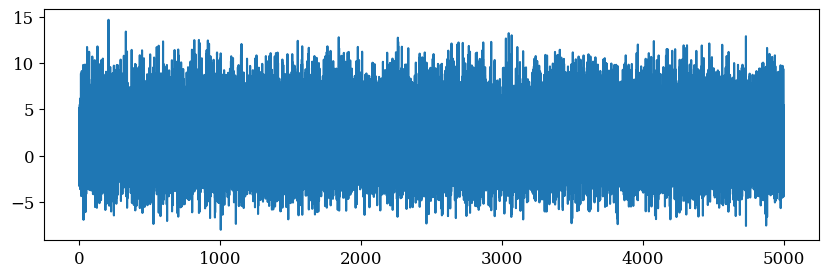

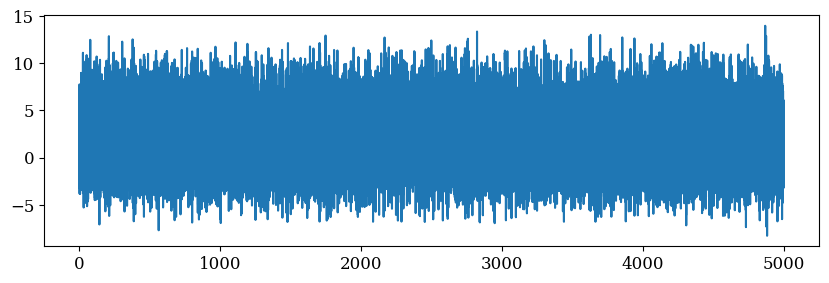

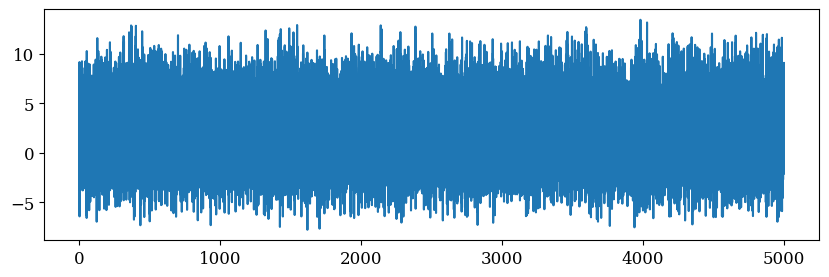

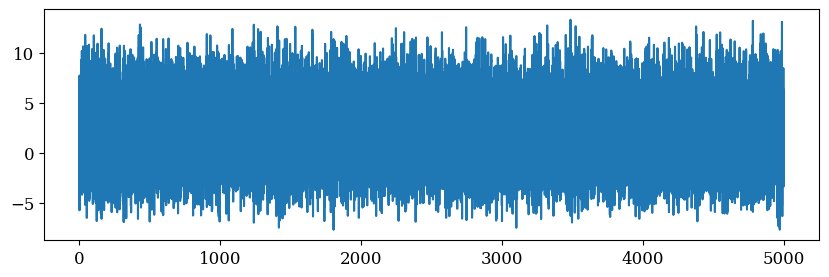

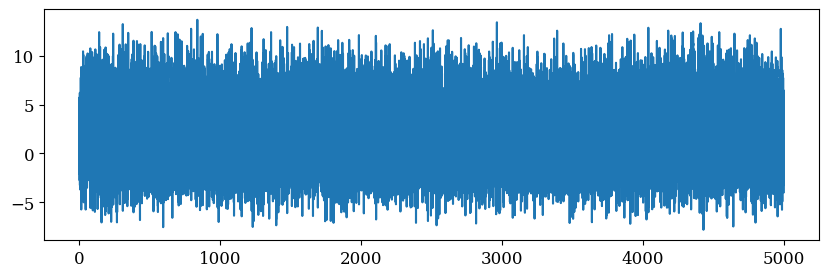

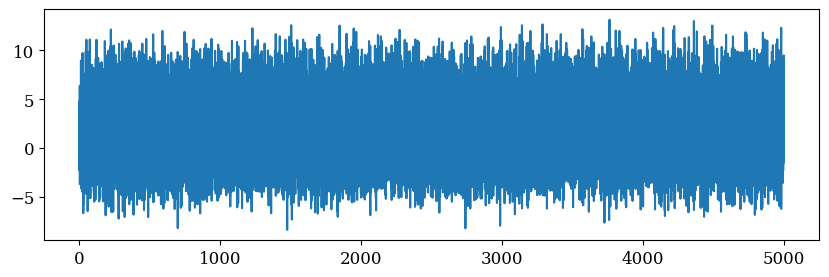

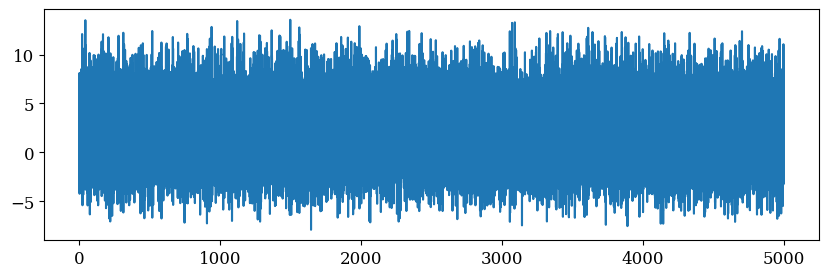

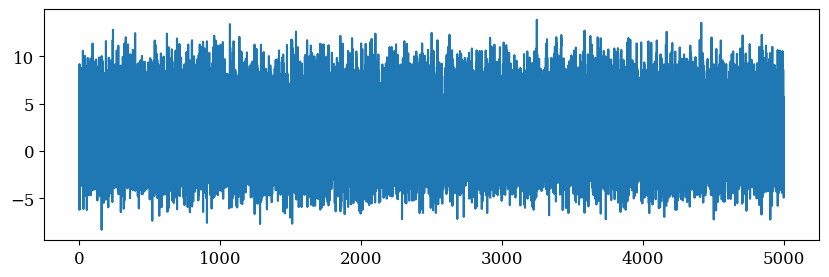

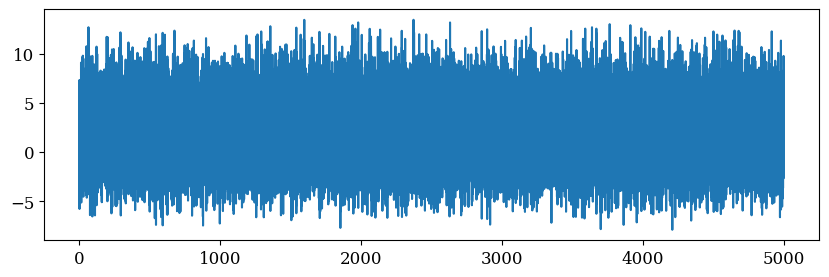

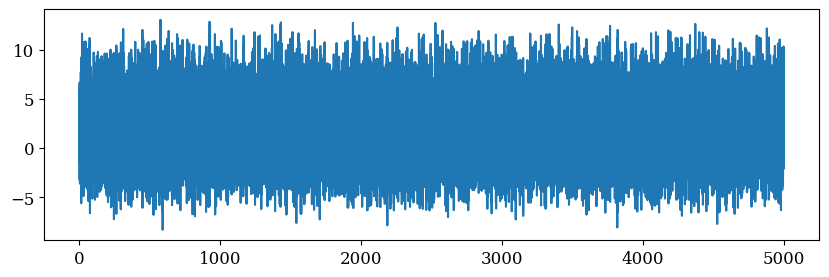

In [38]:
ts_L96_N10_rec8 =plot_trajectory(f, y0=i_s, t_span=(0,5000), dt=0.05)

Text(0.5, 0, 'x3')

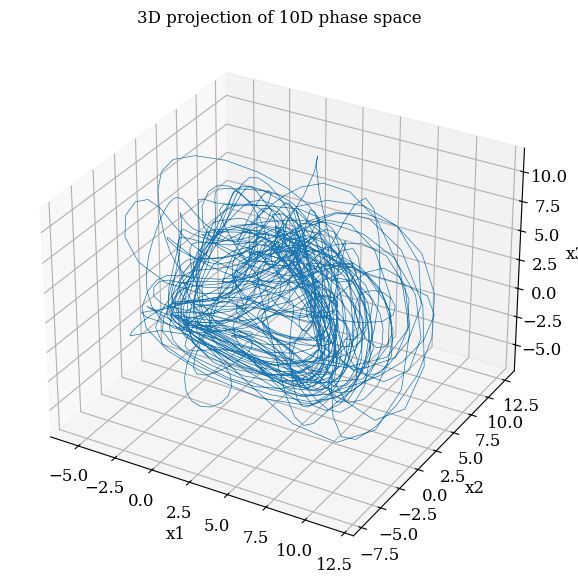

In [48]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(ts_L96_N10_rec8[1000:3000, 0], ts_L96_N10_rec8[1000:3000, 1], ts_L96_N10_rec8[1000:3000, 2], lw=0.5)
plt.title('3D projection of 10D phase space')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')